
# Pytorch一小时入门

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [jupyter,pytorch]
- description: 抄写一遍Pytorch入门代码
---


> 更新记录：
>> 20/05/31(I) 完成前两节（30min）的内容

>> 20/05/31(II) 完成后两节（30min）的内容

学习了[DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ
](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)，将过程记录在此处。

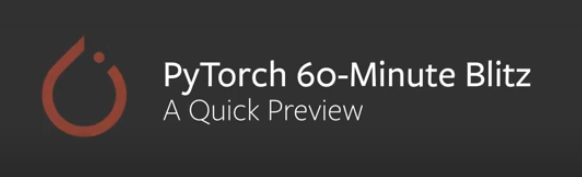

* 1.理解PyTorch的Tensor库
* 2.Autograd自动求导的应用
* 3.构建神经网络
* 4.一个实际的例子

# 理解PyTorch的Tensor库

## Tesnsor的定义
Tensors和NumPy的ndarray结构很像，区别是Tensor可以用于GPU计算。

In [1]:
from __future__ import print_function
import torch

# check the GPU support
dir(torch.cuda)

['BFloat16Storage',
 'BFloat16Tensor',
 'BoolStorage',
 'BoolTensor',
 'ByteStorage',
 'ByteTensor',
 'CharStorage',
 'CharTensor',
 'CudaError',
 'DeferredCudaCallError',
 'DoubleStorage',
 'DoubleTensor',
 'Event',
 'FloatStorage',
 'FloatTensor',
 'HalfStorage',
 'HalfTensor',
 'IntStorage',
 'IntTensor',
 'LongStorage',
 'LongTensor',
 'PIPE',
 'Popen',
 'ShortStorage',
 'ShortTensor',
 'Stream',
 '_CudaBase',
 '_StorageBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_after_fork',
 '_check_capability',
 '_check_driver',
 '_cudart',
 '_dummy_type',
 '_free_mutex',
 '_get_device_index',
 '_host_allocator',
 '_in_bad_fork',
 '_initialized',
 '_lazy_call',
 '_lazy_init',
 '_lazy_new',
 '_load_cudart',
 '_original_pid',
 '_queued_calls',
 '_register_after_fork',
 '_sleep',
 '_utils',
 'check_error',
 'comm',
 'contextlib',
 'ctypes',
 'cudaStatus',
 'cudart',
 'current_blas_handle',
 'current_device'

In [3]:
assert(torch.cuda.is_available())

> 创建一个5x3张量，不初始化

In [4]:
x=torch.empty(5,3)
print(x)

tensor([[ 8.4078e-45,  0.0000e+00,  2.6136e-28],
        [ 5.5772e-43, -1.3120e-30,  4.5915e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.3120e-30,  4.5915e-41,  0.0000e+00]])


**???这里的表现和页面不一样，预期应该是全0才对**

> 创建一个随机初始化张量

In [5]:
x=torch.rand(5,3)
print(x)

tensor([[0.3783, 0.4491, 0.0897],
        [0.2913, 0.1618, 0.6047],
        [0.2112, 0.3987, 0.1202],
        [0.8236, 0.2970, 0.4896],
        [0.4792, 0.2471, 0.6751]])


> 创建一个填0的long型张量

In [9]:
x=torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


> 从数据中直接创建一个张量

In [10]:
x=torch.tensor([5.5,3.0])
print(x)

tensor([5.5000, 3.0000])


> 根据一个已有张量创建张量

In [12]:
# 创建一个类型变为double型的全1张量
x=x.new_ones(5,3,dtype=torch.double)
print(x)

x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.4722, -0.4380, -1.0941],
        [ 0.6054,  0.6555, -1.1304],
        [-1.1721,  1.3889,  0.3657],
        [-1.6273, -0.0502,  0.8097],
        [ 1.3560,  0.1341,  1.6279]])


> torch.size实际是一个tuple

In [13]:
print(x.size())
print(x.size()[0])

torch.Size([5, 3])
5


## Tensor操作

> 加法之两种符号类型

In [14]:
# 类型1- 直接用加号
x = torch.ones(5,3)
y = torch.zeros(5,3)
print(x + y)

# 类型2- 使用函数add
print(torch.add(x,y))


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


**？？？为何要用两种符号表示呢**

> 加法之指定结果tensor

In [16]:
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


> 加法之原位相加

In [17]:
y.add_(x)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


*注意到所有原位运算都是在函数名后边加一个下划线*

> 使用类似numpy的范围写法取tensor的部分值

In [20]:
# 打印x的第一列
print(x[:,1])

# 打印x的第一行
print(x[1,:])

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1.])


> 改变tensor的维度

In [21]:
x = torch.randn(4,4)
y = x.view(16)
# 只指定每行的元素数量，就可以计算出变换后的形状
z = x.view(-1, 2)
print(x,y,z)

tensor([[ 1.7866,  1.8163, -0.4897,  0.6796],
        [-1.1594,  1.8653, -0.4756, -0.8084],
        [ 0.5253,  1.8867,  1.2337, -0.1705],
        [ 0.6688,  0.0531, -0.9582, -0.4612]]) tensor([ 1.7866,  1.8163, -0.4897,  0.6796, -1.1594,  1.8653, -0.4756, -0.8084,
         0.5253,  1.8867,  1.2337, -0.1705,  0.6688,  0.0531, -0.9582, -0.4612]) tensor([[ 1.7866,  1.8163],
        [-0.4897,  0.6796],
        [-1.1594,  1.8653],
        [-0.4756, -0.8084],
        [ 0.5253,  1.8867],
        [ 1.2337, -0.1705],
        [ 0.6688,  0.0531],
        [-0.9582, -0.4612]])


*tensor的操作还有很多，此处实际没有完全列举* 

## Numpy桥接 - 在tensor与numpy数组之间互相转换

numpy数组和tensor共享内存：这意味着对任何一个变量的改变都将同步到另一个上。

> 转化tensor为一个ndarray

In [22]:
a=torch.ones(5)
b=a.numpy()
print(a,b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]


> 对tensor的改变将会反映到ndarray上

In [25]:
a.add_(a)
print(b)

[2. 2. 2. 2. 2.]


> 对ndarray的改变将会反映到tensor上

In [26]:
b+=1
print(a)

tensor([3., 3., 3., 3., 3.])


> 将ndarray转换为tensor

In [27]:
import numpy as np
a = np.ones(5) #注意此处的变量命名
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## GPU上的tensor

> 使用to()方法将tensor迁移到其它设备

In [30]:
device = torch.device("cuda")
y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(z)
print(z.to("cpu", torch.int))

tensor([[ 2.7866,  2.8163,  0.5103,  1.6796],
        [-0.1594,  2.8653,  0.5244,  0.1916],
        [ 1.5253,  2.8867,  2.2337,  0.8295],
        [ 1.6688,  1.0531,  0.0418,  0.5388]], device='cuda:0')
tensor([[2, 2, 0, 1],
        [0, 2, 0, 0],
        [1, 2, 2, 0],
        [1, 1, 0, 0]], dtype=torch.int32)


# Autograd自动求导的应用

pytorch中神经网络的核心模块就是`autograd`包，我们简单地了解一下这个包，其后就可以开始训练我们的第一个神经网络了。

`autograd`包可以对所有的tensor操作进行自动差分（？？？如何自定义运算符）。它是一个define-by-run的框架，也就是你的反向传播是由代码运行方式所决定的，每一个操作都会有不同。

我们用更简单的方式和例子进行解释。

## tensor

`torch.Tensor`是这个包的核心。如果你将其属性`.requires_grad`设为True，它将追踪其上的所有操作。当你完成计算后，可以调用`.backward()`方法以自动计算所有导数。这个tensor的导数将由`.grad`参数所体现。

为了结束对一个tensor求导的操作，你可以用`.detach`方法将它从计算历史中移除，以避免之后它又被继续求导。

为了避免对tensor求导占用内存，你可以将代码块用`with torch.no_grad()`包裹起来。这对模型评估尤其有用，因为其中可能存在设置了`require_grad=True`的参数，但我们却不需要求导数。

`Function`类是另外一个非常常用的类。

`Tensor`和`Function`共同作用以构建一个无环图，该图对完整的计算历史进行编码。每个tensor都有一个`.grad_fn`属性，其中保存了创建这个tensor的`Function`对象。（用户自己创建的tensor则没有这个属性）

如果你想计算导数，你可以调用tensor的`.backward()`方法。如果tensor是一个标量（即包含单个元素），你不需要为`backward()`指定任何参数。但如果它有多于一个元素，则你必需为它指定`gradient`参数，其形状与该tensor对应。





> 创建一个tensor并设定`require_grad`为True以追踪其上的计算：

In [33]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


> tensor运算

In [34]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


> 更多的tensor运算

In [35]:

z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


> `.requires_grad_()`可用于替换一个已有tensor的`require_grad`标志位。输入标志位默认为`False`。

In [40]:
a = torch.randn(2,2)
a=((a*3)/(a-1))
print(a.requires_grad)
print(a.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
print(a.grad_fn)
b=(a*a).sum()
print(b.grad_fn)

False
None
True
None


> 进行反向传播。由于`out`是一个标量，所以无需传入参数

In [41]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


如果我们将out定义为$o$,那么我们将有$o=\frac{1}{4}\sum_{i}3(x_i+2)^2$,此时$\frac{\partial o}{\partial x_i}=\frac{3}{2}(x_i+2)$,因此$\frac{\partial o}{\partial x_i} \mid_{x_i=1}=4.5$

数学上来说，如果你有一个因自变量都为向量的函数$\vec{y}=f(\vec{x})$,那么$\vec{y}$对$\vec{x}$的导数为一个雅可比矩阵：

$J=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)$

一般地，`torch.autograd`是一个用于计算向量-雅可比行列式乘积的工具。也就是说，给定任何向量$v=(v_1 v_2 ... v_m)^T$，如果$v$刚好是标量函数$l=g(\vec{y})$的导数，也就是说$v=\left(\frac{\partial l}{\partial y_{1}} \cdots \frac{\partial l}{\partial y_{m}}\right)^{T}$，那么根据链式法则有向量与雅克比行列式之积为
$J^{T} \cdot v=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\left(\begin{array}{c}
\frac{\partial l}{\partial y_{1}} \\
\frac{\partial l}{\partial y_{m}}
\end{array}\right)=\left(\begin{array}{c}
\frac{\partial l}{\partial x_{1}} \\
\frac{\partial l}{\partial x_{n}}
\end{array}\right)$

向量与雅克比行列式之积的这种性质使得，将额外的导数引入输出不为常量的模型非常方便。
现在我们看一下向量-雅克比积的一个例子：

In [44]:
x = torch.randn(3, requires_grad=True)
y = x * 2

while y.data.norm()<1000:
    y=y*2

print(y)

tensor([-800.3267,  194.5804,  608.2095], grad_fn=<MulBackward0>)


在这个例子中`y`不再是一个标量了。`torch.autograd`不能直接计算完整的雅克比行列式，但如果我们只想要向量-雅克比行列式之积的话，就简单将向量传入`backward`参数即可：

In [45]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


> 关于上面这一段[知乎链接](https://zhuanlan.zhihu.com/p/29923090)讲的比较清楚，主要动机是不允许tensor对tensor求导，只允许scalar对tensor求导。

如果想对已经设置`requires_grad=True`的张量停止自动求导，有两种方式：

1.使用`with torch.no_grad()`包裹

2.使用`.detach()`获取一个新的不需导数的张量

In [46]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)
    
print(x.requires_grad)
y=x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
True
False
True
False
tensor(True)


# 神经网络

`torch.nn`用于构建神经网络。

现在你已经了解了`autograd`包，`nn`依赖`autograd`以定义模型并对其求差分。`nn.Module`的一个实例会包含网络层，以及一个`forward(input)`方法用于返回`output`。

如，看看下边这个定义用于对位图分类的网络：

上图是一个简单的前向网络，它接收输入，依次喂给几层，最终得到输出。
一个典型的训练过程如下：
* 定义有一些可训练参数的网络
* 输入一组数据
* 前向传播
* 计算损失函数值
* 反向传播获取梯度
* 更新网络权重，通常使用`weight=weight-learning_rate*gradient`

## 定义网络

以下代码用于定义网络：

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 输入只有一个灰度channel，输出为6个channel，每个channel为3*3卷积获取
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        # 尾部的全连接层
        # 3*3卷积得到的输出是6*6
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        # batch维不会被压平
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
    def forward(self, x):
        # 做最大池化以下采样
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # 如果是用的方阵的话也可以只写行数或列数
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # 形状变换
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


你必需定义`forward`方法。`backward`方法会在指定`autograd`时自动计算得到。`forard`方法中可以用任意tensor操作。

网络可学习的参数由`net.parameters()`导出：

In [4]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


我们测试一个随机的32x32输入。注意这个网络的输入大小是32x32。为了在MNIST数据集上使用这个网络，必需将数据的大小变换为32x32:

In [5]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.0251, -0.0923, -0.0807, -0.0411,  0.1351,  0.1501,  0.0616, -0.0283,
          0.1091,  0.1278]], grad_fn=<AddmmBackward>)


清空所有参数的梯度缓存，使用随机梯度进行反向传播：

In [8]:
net.zero_grad()
??torch.nn.Module.zero_grad
# 这里为何要用随机，不用ones呢
out.backward(torch.randn(1,10))

Signature: torch.nn.Module.zero_grad(self)
Source:   
    def zero_grad(self):
        r"""Sets gradients of all model parameters to zero."""
        for p in self.parameters():
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
File:      c:\users\henryalps\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\module.py
Type:      function


在继续之前，先回顾一下我们见过的所有类：
**回顾**

*
`torch.Tensor` - 是一个支持`backwrd()`形式的自动差分操作的多维数组。他也持有梯度值；

* `nn.Module` 神经网络模块，方便打包模型参数以加载、导出或者迁移。

* `nn.Parameter` 在配置为Module的属性时，会被自动注册为模型参数。

* `autograd.Function` 每个Tensor操作创建至少一个Function节点，该节点与一个创建Tensor的方法相关联。

**我们已经做的**

* 定义一个神经网络
* 处理输入并反向传播

**待做的**
* 计算loss
* 更新网络权重



## 损失函数

损失函数接受（输出，目标）格式输入，并计算出一个值，用于衡量输出与目标之间的偏离程度。

nn包提供了几种不同的损失函数。`nn.MSELoss`计算了输入与目标之间的均方误差。

比如：

In [10]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9722, grad_fn=<MseLossBackward>)


现在，如果你用`.grad_fn`去跟随loss的反向传播过程，你会看到一个这样的计算图：
`
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d 
-> view -> linear -> relu -> linear  -> relu -> linear
-> MSELoss
-> loss
`
所以当我们调用`loss.backward()`时，整个计算图对loss求梯度，图中设置`require_grad=True`的Tensor将把它们的`.grad`属性与梯度相加。

比如，我们回溯几步：

In [13]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## 反向传播

为了反向传播误差，我们必须手动调用`loss.backward()`。调用之前需要清除已有的梯度值，否则会累加到已有的梯度值上。

现在我们需要调用`loss.backward()`，并分别在调用前和调用后查看convI的偏差值。

In [16]:
net.zero_grad()

print('conv1.bias.grad befor backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')

print(net.conv1.bias.grad)




conv1.bias.grad befor backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0108, -0.0118,  0.0027, -0.0026,  0.0037,  0.0074])


现在，我们知道了如何应用损失函数。

需要学习的只有一个：
* 更新网络的权重。

## 权重更新

最简单的权重更新规则是随机梯度下降（SGD），如下：
`
weight = weight - learning_rate * gradient
`
我们可以用简单的python代码实现该功能：

`
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.date * learning_rate)
`

但是，在你使用网络时，你可能想用不同的更新规则如Adam、RMSProp等。为了支持这些更新规则，我们创建了一个轻量包`torch.optim`以实现这些方法。使用非常简单：

```python
import torch.optim as optim

# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练的过程中
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()
```

*注意梯度缓存必须手动用`optimizer.zero_grad()方式清除，这是因为梯度是一个累加值`*

# 训练一个分类器

你已经看到如何定义神经网络，计算损失并且更新网络的权重，现在你可能在思考。

## 数据在哪里？

通常，在你处理图像、文本、声音或影像数据时，你可以用标准的python包将数据读入一个numpy数组，此后你就可以将数组转为tensor：
* 图像方面，Pillow或OpenCV都有用
* 声音方面，scipy或者librosa都有用
* 文本方面，原始的python、cython、NLTK或者SpaCy都有用

特别的，对于视觉类任务，我们创建了一个名为torchvision的包，可以用于Imagenet，CIFAR10，MNIST等数据集的导入。
这使得我们得以避免重写一些数据载入的代码。

本教程中，我们将用 CIFAR 10数据集举例。该数据集包含10个类别，每个样本都是一个3*32*32的多维数组：
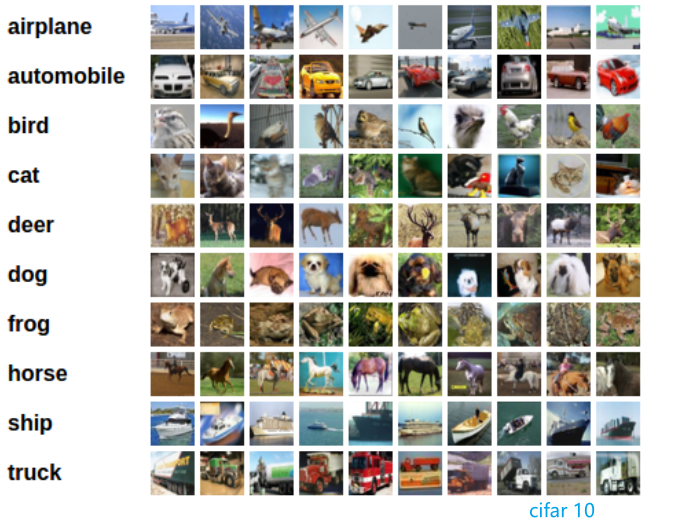

## 训练图片分类器

我们将依次进行下列操作：

1.读取和正则化CIFAR 10 训练和测试集
2.定义一个CNN
3.定义一个损失函数
4.在训练集上完成训练
5.使用测试集完成测试



### 1. 读取与正则化CIFAR10数据集

使用`torchvision`时，读取CIFAR10数据集非常简单：

```python
import torch
import torchvision
import torchvision.transforms as transforms
```

torchvision的输出是[0,1]之间的PILImage格式图片。我们将它们转化为[-1,1]之间的数据。
`如果你在windows上运行遇到BrokenPipeError，将torch.utils.data.DataLoader()的num_worker参数设置为0`

In [26]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
[transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,download=True,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100.0%

Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified


我们看几张训练集中的图片：

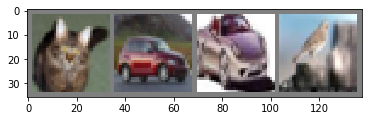

  cat   car   car  bird


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 查看图片
imshow(torchvision.utils.make_grid(images))
# 打印类别
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2.定义一个CNN
改造之前的CNN使其支持3个通道的图片：

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 输入为3通道，输出为6个channel，每个channel为5*5卷积获取
        self.conv1 = nn.Conv2d(3,6,5)
        # ？ 之前用nn.functional.max_pool2d即可，现在换成nn.MaxPool2d了
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        # 尾部的全连接层
        # 5*5卷积得到的输出变小了
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        # batch维不会被压平
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # 如果是用的方阵的话也可以只写行数或列数
        x = self.pool(F.relu(self.conv2(x)))
        # 形状变换
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3.定义损失函数和优化器

我们用一个分类器交叉熵做为损失函数，并用带动量的SGD作为权重更新方法：

In [36]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4.训练网络

开始变得好玩了，我们只需要遍历我们的数据迭代器，将输入喂给网络并进行优化：

In [38]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # 数据是一个序列
        
        optimizer.zero_grad() # 清空梯度缓存
        # 前向传播
        outputs = net(inputs)
        # 反向传播
        loss = criterion(outputs, labels)
        loss.backward()
        # 更新权重
        optimizer.step()
        
        # 打印统计参数
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
    print('Finished Training')

[1,  2000] loss: 2.226
[1,  4000] loss: 1.888
[1,  6000] loss: 1.717
[1,  8000] loss: 1.610
[1, 10000] loss: 1.523
[1, 12000] loss: 1.481
Finished Training
[2,  2000] loss: 1.399
[2,  4000] loss: 1.367
[2,  6000] loss: 1.338
[2,  8000] loss: 1.311
[2, 10000] loss: 1.288
[2, 12000] loss: 1.294
Finished Training


最后保存我们训练好的模型：

In [40]:
PATH = '../model/cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5.测试网络在测试集上的效果

我们在训练集上训练了两个epoch，现在检查下网络是否有学到什么东西。

我们通过预测网络对于测试集的输出，并将其与ground-truth相互对比，如果预测结果正确，则将结果加入正确预测列表之内。

首先，看下测试集中的一个minibatch：

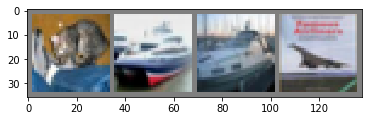

GroundTruth:   cat  ship  ship plane


In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

之后，我们加载已经读取的模型：

In [43]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

现在我们看看网络认为上述示例是什么类型：

In [44]:
outputs = net(images)

输出的是10个类别的分数。某个类别的分数越高，网络就越是认为样本属于这个类别。因此我们获取具有最大分数的类别作为结果：

In [45]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog  ship  ship plane


？错了一个，和原始教程中不一样。
我们再看看网络在整个数据集上的表现：

In [47]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))

Accuracy of the network on the 10000 test images: 55 %


看起来比随机猜测好很多（随机猜测有10%的概率猜中，准确率的期望为 10%）。网络学到了一些东西。

我们看看在哪些类别上网络表现好，哪些差：

In [49]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        image, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane :  0 %
Accuracy of   car : 26 %
Accuracy of  bird :  0 %
Accuracy of   cat : 24 %
Accuracy of  deer :  0 %
Accuracy of   dog : 25 %
Accuracy of  frog :  0 %
Accuracy of horse : 25 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


我们该如何在GPU上运行这些网络呢？

### 在GPU上运行

可以用和迁移Tensor一样的方法将网络迁移到GPU上。
首先设置设备为首个cuda设备，如果cuda可用的话：

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


如若机器上有CUDA设备，那么这些方法将递归地遍历所有模块，并将它们的参数和缓存转换为cuda上的张量：

In [3]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

同时，你也需要将每一步的输入和目标送个GPU:

In [54]:
inputs,labels = data[0].to(device), data[1].to(device)

为什么GPU速度没有明显提升呢？因为网络太小了。

**练习**增加网络的宽度（首个nn.Conv2d的第二个参数与第二个nn.Conv2d的第一个参数），看看加速能达到多少。

目标完成：
* 理解Tensor库和神经网络
* 训练一个小的神经网络用于分类图片